In [53]:
import pandas as pd
import requests
from io import StringIO
import os
from dotenv import load_dotenv
import matplotlib as plt
import seaborn as sns



In [19]:
load_dotenv()

True

# Lectura y Preparación

In [20]:
myurl = os.environ["RESUMEN_CIERE_URL"] + "?" + os.environ["AZURE_DATALAKE_GENAI_TOKEN"]
context = requests.get(myurl).text
df_resumen = pd.read_json(StringIO(context))


In [21]:

myurl = os.environ["DETALLE_TAREAS_URL"] + "?" + os.environ["AZURE_DATALAKE_GENAI_TOKEN"]
df = pd.read_parquet(myurl)


In [66]:
df["ID_TAREA"]=df.CODIGO_TAREA+"-"+df.DESCRIPCION_TAREA
df["DURACION_MIN"]=(df.DURACION_SEGUNDOS/60).round(0)
df["DURACION_HR"]=df.DURACION_SEGUNDOS/60/60

In [34]:
df_tareas_agg=df.groupby(["ID_TAREA"], as_index=False,)["DURACION_SEGUNDOS"].agg(["max","min","mean","median","count","sum"]	).sort_values("sum",ascending=False)


# Análisis

## Top horas totales

In [35]:
df_agg_top=df_tareas_agg.sort_values("sum",ascending=False).head(10)
df_agg_top


,ID_TAREA,max,min,mean,median,count,sum
7,PAUSA-Pausa cargar interfaz SIAD new,7293,101,4049.652174,5077.0,23,93142
17,PBCGD017-GENERACION FSH012 NUEVO,1872,1667,1783.043478,1793.0,23,41010
151,PSNG9122-Genera Datos Tablon,1208,1082,1141.260870,1144.0,23,26249
106,PNU00217-Pasaje Resultados M/E a M/N Ac,1917,574,1132.260870,1073.0,23,26042
65,PJBWM077-Carga datos para tablas ICS,1350,839,1002.260870,995.0,23,23052
122,PPP92005-Cobrador de prestamos,1123,770,892.608696,875.0,23,20530
112,PP017-Depurador,1655,693,862.130435,808.0,23,19829
32,PCC00003-Devengamiento Vista,1340,631,855.826087,848.0,23,19684
5,PAUSA-PAUSA para cargar pagos,3810,31,832.391304,452.0,23,19145
99,PNU00002-Devengamiento a Plazo,967,631,740.347826,722.0,23,17028


In [37]:
lst_top=df_agg_top["ID_TAREA"].to_list()
#lst_top

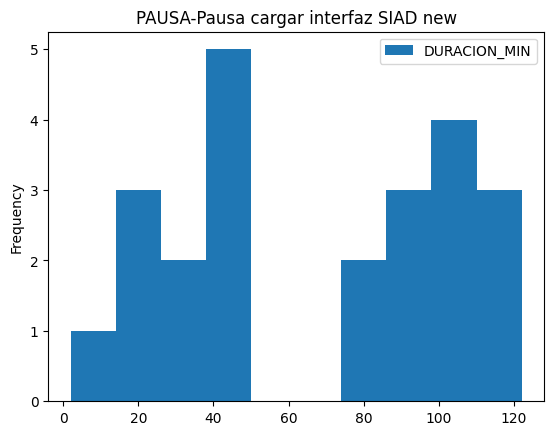

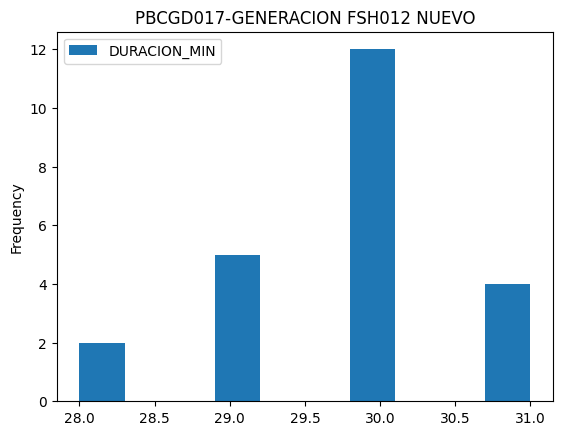

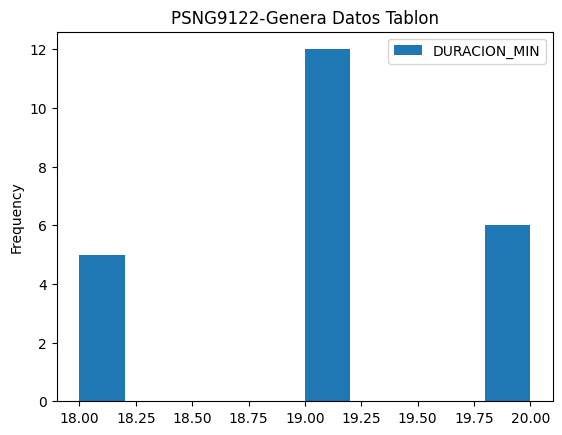

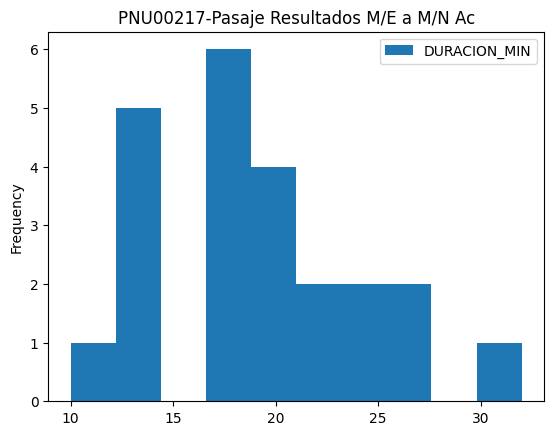

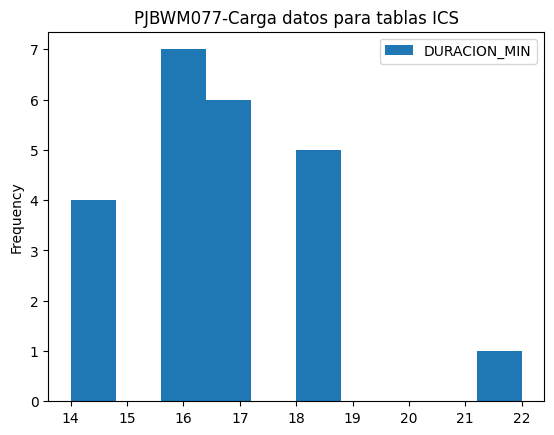

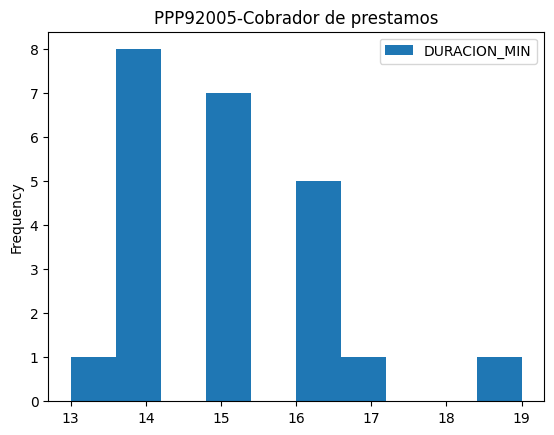

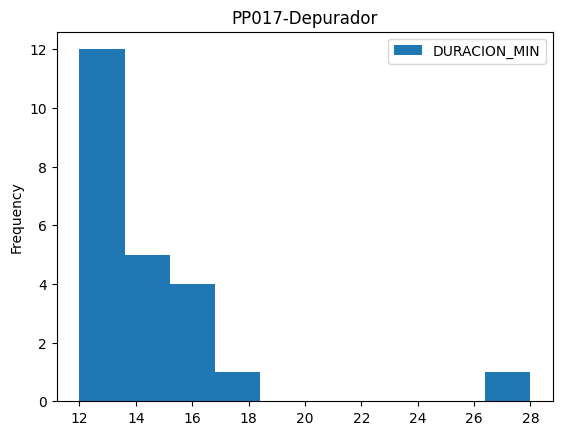

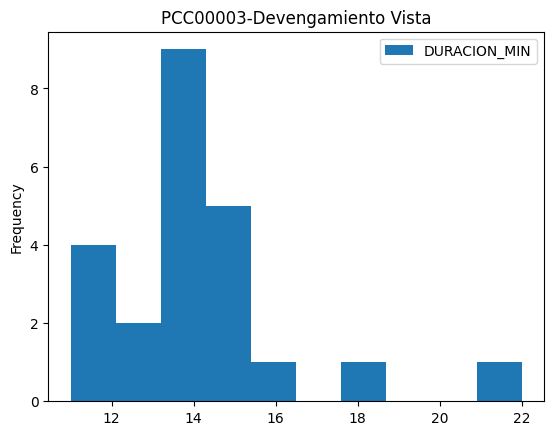

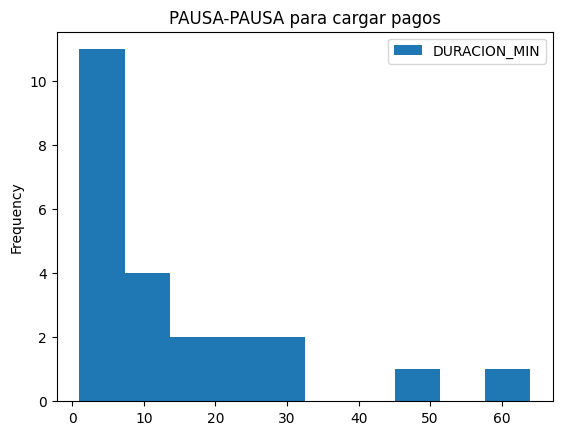

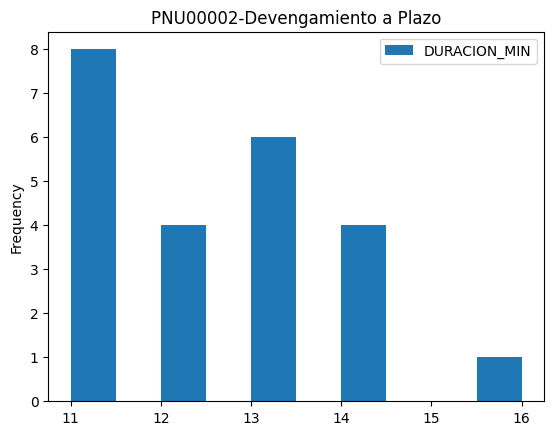

In [69]:
#df[df["ID_TAREA"].isin(lst_top)][["ID_TAREA","DURACION_SEGUNDOS"]].plot.hist(by="ID_TAREA",subplots=True)
#g = sns.FacetGrid(df[df["ID_TAREA"].isin(lst_top)][["ID_TAREA","DURACION_SEGUNDOS"]], row="ID_TAREA")
#g.map(sns.histplot, "DURACION_SEGUNDOS")
#plt.figure(figsize=(2,5)) 
for tarea in lst_top:
    df[df["ID_TAREA"]==tarea][["ID_TAREA","DURACION_MIN"]].plot.hist(bins=10,by="ID_TAREA")